In [1]:
import icon_registration
import multiscale_constr_model

In [2]:
import icon_registration as icon
import icon_registration.data
import icon_registration.networks as networks
from icon_registration.config import device

import numpy as np
import torch
import torchvision.utils
import matplotlib.pyplot as plt

/media/data/hastings/InverseConsistency/.venv/lib/python3.8/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.2) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


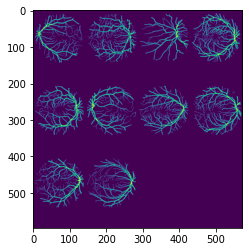

In [3]:
ds1, ds2 = icon_registration.data.get_dataset_retina(include_boundary=False, fixed_vertical_offset=200)

sample_batch = next(iter(ds1))[0]
plt.imshow(torchvision.utils.make_grid(sample_batch[:12], nrow=4)[0])

In [4]:
icon_registration.data.get_dataset_retina?


In [7]:
ci.ConsistentFromMatrix?


Object `ci.ConsistentFromMatrix` not found.


In [8]:
import multiscale_constr_model as ci

In [9]:
ts = ci.FirstTransform(ci.TwoStepInverseConsistent(
    ci.DownsampleRegistration(
        ci.DownsampleRegistration(
            ci.ConsistentFromMatrix(icon.networks.ConvolutionalMatrixNet(dimension=2)),
            dimension=2),
        dimension=2
    ),
    ci.TwoStepInverseConsistent(
        ci.DownsampleRegistration(
            ci.ConsistentFromMatrix(icon.networks.ConvolutionalMatrixNet(dimension=2)),
            dimension=2
        ),
        ci.TwoStepInverseConsistent(
            ci.ICONSquaringVelocityField(icon.networks.tallUNet2(dimension=2)),
            ci.ICONSquaringVelocityField(icon.networks.tallUNet2(dimension=2)),
            
        )
    )
))
                                 
net = icon.losses.DiffusionRegularizedNet(ts, icon.LNCC(sigma=4), lmbda=1.5)
net.assign_identity_map(sample_batch.shape)
net.cuda()
0

0

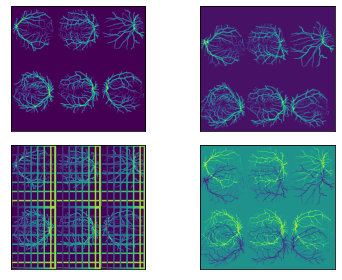

In [10]:
def show(tensor):
    plt.imshow(torchvision.utils.make_grid(tensor[:6], nrow=3)[0].cpu().detach())
    plt.xticks([])
    plt.yticks([])
image_A = next(iter(ds1))[0].to(device)
image_B = next(iter(ds2))[0].to(device)
net(image_A, image_B)
plt.subplot(2, 2, 1)
show(image_A)
plt.subplot(2, 2, 2)
show(image_B)
plt.subplot(2, 2, 3)
show(net.warped_image_A)
plt.contour(torchvision.utils.make_grid(net.phi_AB_vectorfield[:6], nrow=3)[0].cpu().detach())
plt.contour(torchvision.utils.make_grid(net.phi_AB_vectorfield[:6], nrow=3)[1].cpu().detach())
plt.subplot(2, 2, 4)
show(net.warped_image_A - image_B)
plt.tight_layout()



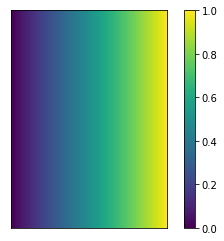

In [11]:
show(net.phi_AB_vectorfield[:, 1])
plt.colorbar()

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:32<00:00,  6.46s/it]


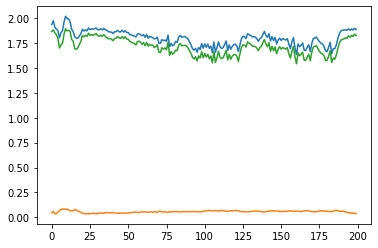

In [14]:
net.train()
net.to(device)
optim = torch.optim.Adam(net.parameters(), lr=0.001)
curves = icon.train_datasets(net, optim, ds1, ds2, epochs=5)
plt.close()
plt.plot(np.array(curves)[:, :3])



100%|█████████████████████████████████████████████████████████████████████████████████| 45/45 [05:06<00:00,  6.82s/it]


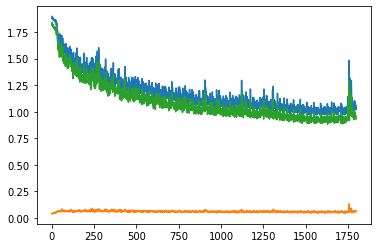

In [15]:
curves = icon.train_datasets(net, optim, ds1, ds2, epochs=45)
plt.close()
plt.plot(np.array(curves)[:, :3])


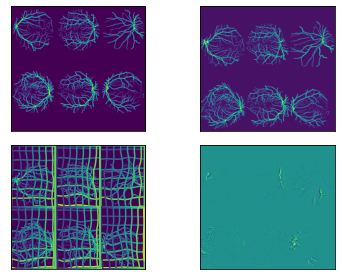

In [16]:
def show(tensor):
    plt.imshow(torchvision.utils.make_grid(tensor[:6], nrow=3)[0].cpu().detach())
    plt.xticks([])
    plt.yticks([])
image_A = next(iter(ds1))[0].to(device)
image_B = next(iter(ds2))[0].to(device)
net(image_A, image_B)
plt.subplot(2, 2, 1)
show(image_A)
plt.subplot(2, 2, 2)
show(image_B)
plt.subplot(2, 2, 3)
show(net.warped_image_A)
plt.contour(torchvision.utils.make_grid(net.phi_AB_vectorfield[:6], nrow=3)[0].cpu().detach())
plt.contour(torchvision.utils.make_grid(net.phi_AB_vectorfield[:6], nrow=3)[1].cpu().detach())
plt.subplot(2, 2, 4)
show(net.warped_image_A - image_B)
plt.tight_layout()

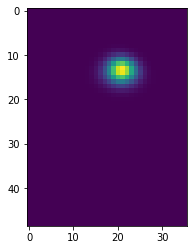

In [63]:
plt.imshow(ar.attention.cpu().detach()[0, 956].reshape(ar.identity_map.shape[2], ar.identity_map.shape[3]))

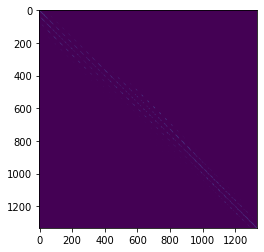

In [218]:
plt.imshow(ar.attention.cpu().detach()[0])

In [219]:
import math
math.sqrt(1332.)

36.49657518178932

In [109]:
37 * 36

1332